In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.shape

(200, 5)

In [8]:
data.size

1000

In [9]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
data.drop('CustomerID',inplace=True,axis=1)

In [11]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

In [35]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,1
197,1,32,126,74,1
198,1,32,137,18,1


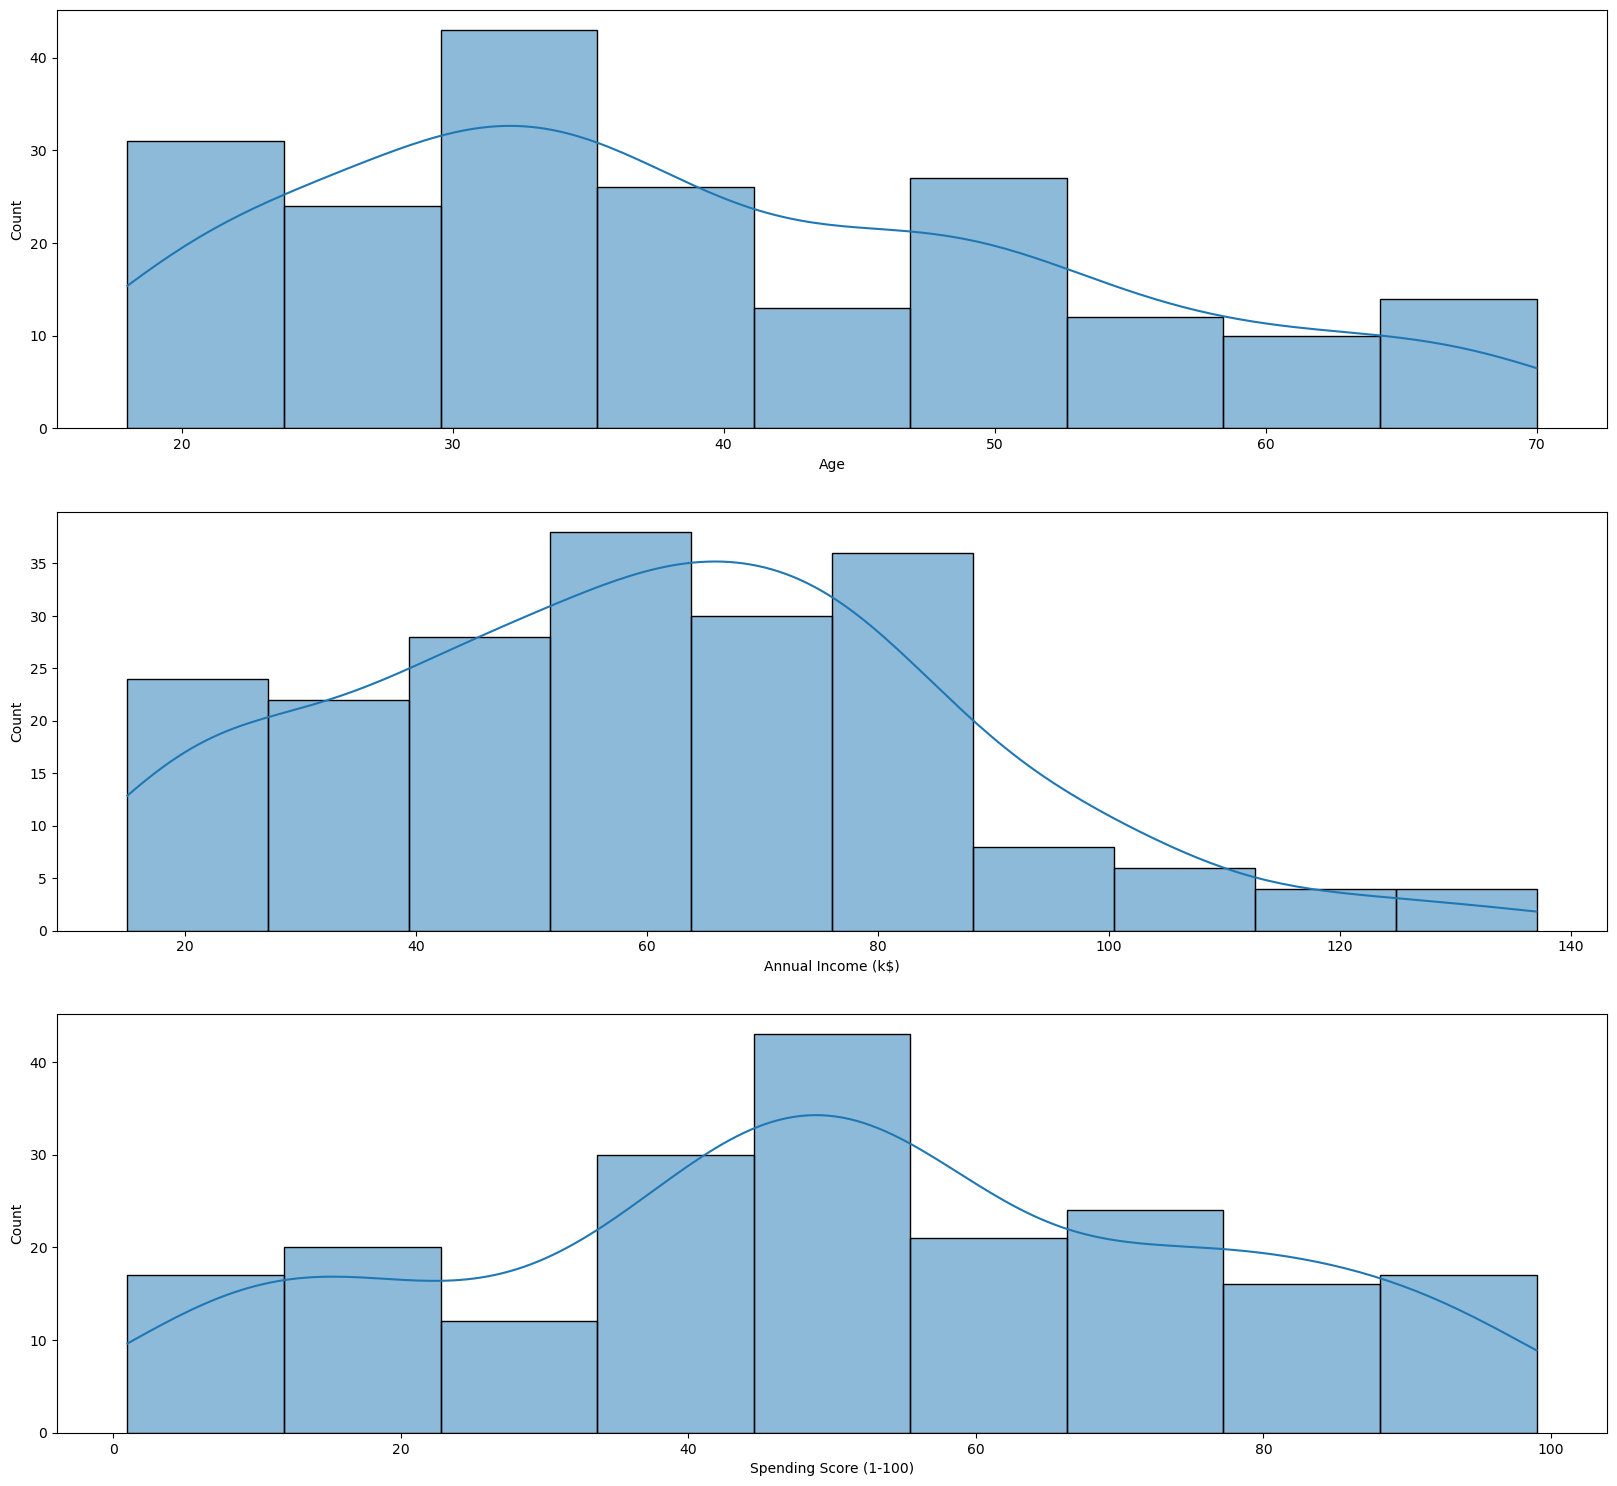

In [12]:
figure=plt.figure(figsize=(20,25))
for i in range(1,4):
    plt.subplot(4,1,i)
    sns.histplot(data.iloc[:,i],kde=True)

In [13]:
X=data.iloc[:,1:]
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [14]:
data.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [15]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [16]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## USING K-MEANS CLUSTERING

  File "C:\Users\Rajeswari Burnwal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Rajeswari Burnwal\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rajeswari Burnwal\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\U

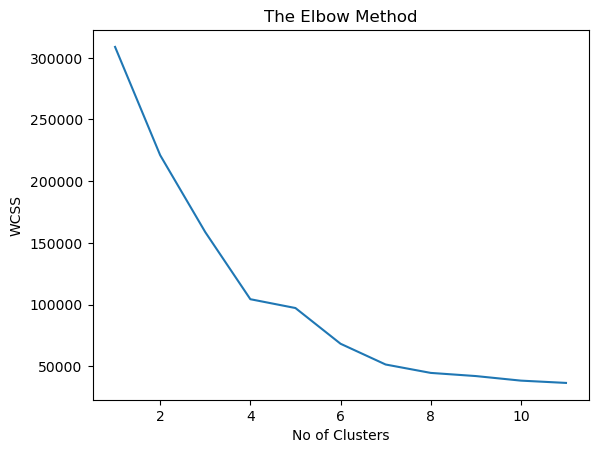

In [17]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
wcss=[]
for i in range(1,12):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

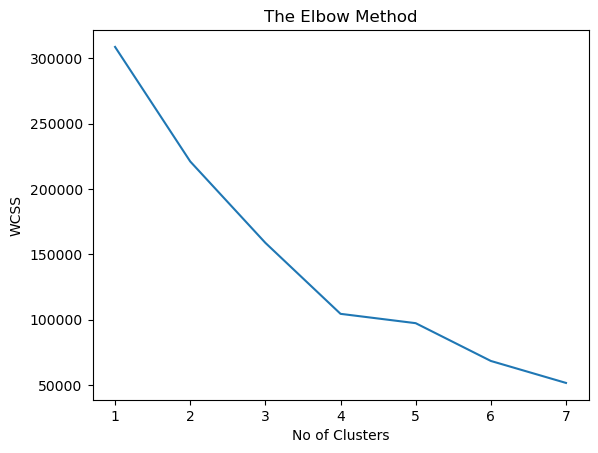

In [18]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
wcss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

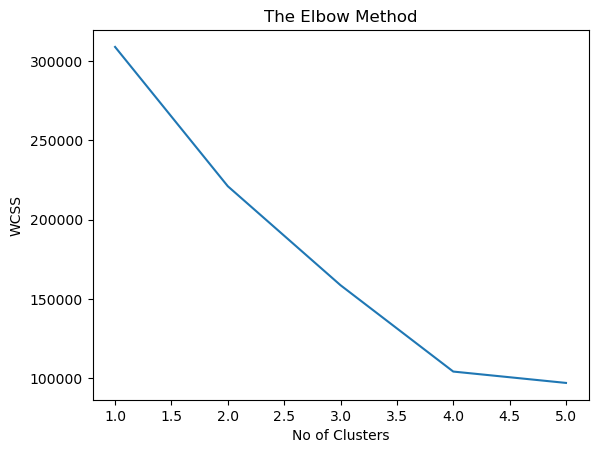

In [19]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,6),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [21]:
label=model.labels_
label

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1], dtype=int32)

In [22]:
data.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
199,1,30,137,83


In [23]:
model.cluster_centers_

array([[44.48387097, 59.87903226, 35.42741935],
       [32.97560976, 88.73170732, 79.24390244],
       [25.77142857, 29.97142857, 68.51428571]])

In [24]:
from collections import Counter
Counter(label)

Counter({np.int32(0): 124, np.int32(1): 41, np.int32(2): 35})

In [25]:
new_point=[[120,140,160]]
model.predict(new_point)

array([1], dtype=int32)

In [26]:
data['Labels']=label
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,1
197,1,32,126,74,1
198,1,32,137,18,1


In [27]:
(data.loc[data['Labels']==0].iloc[:,3].mean(),data.loc[data['Labels']==0].iloc[:,1].mean(),data.loc[data['Labels']==0].iloc[:,2].mean())

(np.float64(35.42741935483871),
 np.float64(44.483870967741936),
 np.float64(59.87903225806452))

In [28]:
(data.loc[data['Labels']==1].iloc[:,3].mean(),data.loc[data['Labels']==1].iloc[:,1].mean(),data.loc[data['Labels']==1].iloc[:,2].mean())

(np.float64(79.2439024390244),
 np.float64(32.97560975609756),
 np.float64(88.73170731707317))

In [29]:
(data.loc[data['Labels']==2].iloc[:,3].mean(),data.loc[data['Labels']==2].iloc[:,1].mean(),data.loc[data['Labels']==2].iloc[:,2].mean())

(np.float64(68.51428571428572),
 np.float64(25.771428571428572),
 np.float64(29.97142857142857))

In [30]:
label

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1], dtype=int32)

In [31]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score

np.float64(0.335580238662684)

## USING LINEAR REGRESSION